In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
# 한글 이슈 해결 - 로컬

import os
# import matplotlib.pyplot as plt

# mac
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')

# windows
else:
    plt.rc('font', family='Malgun Gothic')

# 데이터 불러오기

In [5]:
df = pd.read_csv('data/E-Commerce Shipping Data/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [18]:
sns.set_palette('pastel')
sns.set_style('whitegrid')

# Warehouse_block 컬럼 기준
- 배송방법에 따라 창고가 다른가?
- 특정 창고에서 출발하는 상품들의 reach on time이 잘 지켜지는지? - 여긴 다른 파트
- 특정 창고에 있는 상품들이 할인을 많이 하는지
- 특정 창고마다 가격이 다른지 (할인과 묶어서)
- 특정 창고마다 제품의 중요도가 다른지
- 특정 창고마다 어떤 성별의 고객의 구매율이 높은지
- 특정 창고마다 무게가 다른지

### 창고마다 배송방식이 다른지

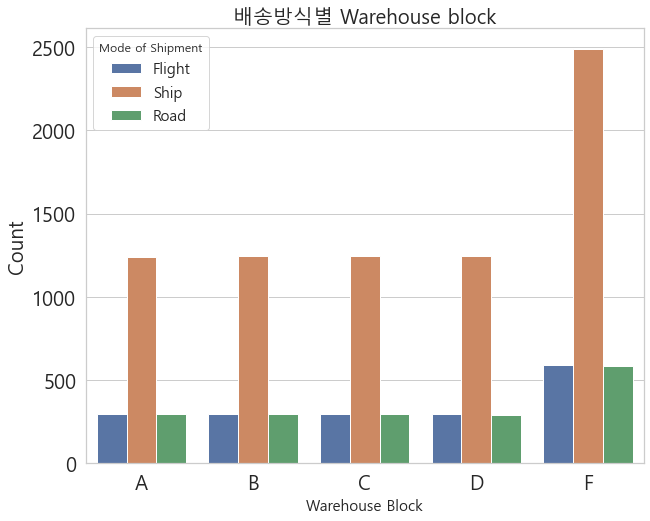

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Warehouse_block', hue='Mode_of_Shipment', order=['A', 'B', 'C', 'D', 'F'])
# plt.title('Mode of Shipment by Warehouse Block')
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(title='Mode of Shipment', fontsize=15)
plt.title('배송방식별 Warehouse block', fontsize=20)
plt.show()

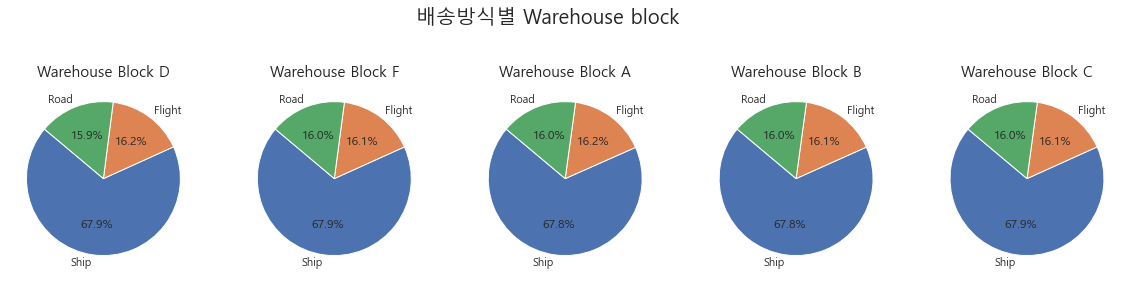

In [16]:
# Warehouse_block 값별 Mode_of_Shipment 비율 파이 차트
fig, axes = plt.subplots(1, len(df['Warehouse_block'].unique()), figsize=(20, 5))

for i, block in enumerate(df['Warehouse_block'].unique()):
    df_block = df[df['Warehouse_block'] == block]
    shipment_counts = df_block['Mode_of_Shipment'].value_counts()
    axes[i].pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Warehouse Block {block}', fontsize=15)

plt.suptitle('배송방식별 Warehouse block', fontsize=20)
# plt.title("배송방식별 Warehouse block")
plt.show()

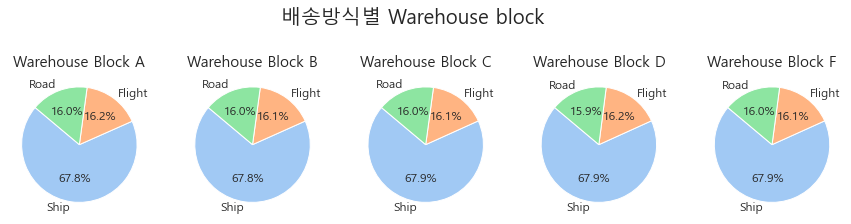

In [23]:
# Warehouse_block 값별 Mode_of_Shipment 비율 파이 차트 (순서 변경)
fig, axes = plt.subplots(1, len(df['Warehouse_block'].unique()), figsize=(15,4))

# Warehouse_block의 순서를 변경
warehouse_block_order = ['A', 'B', 'C', 'D', 'F']

for i, block in enumerate(warehouse_block_order):
    df_block = df[df['Warehouse_block'] == block]
    shipment_counts = df_block['Mode_of_Shipment'].value_counts()
    axes[i].pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    axes[i].set_title(f'Warehouse Block {block}', fontsize=15)

plt.suptitle('배송방식별 Warehouse block', fontsize=20)
plt.show()


### 특정 창고마다 제품의 중요도가 다른지

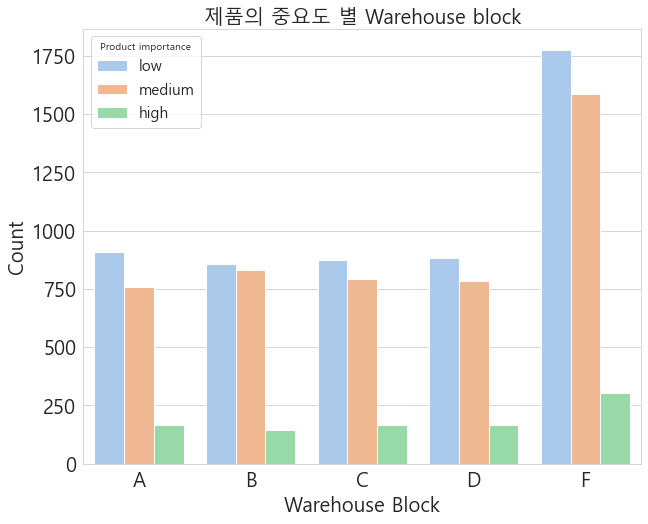

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Warehouse_block', hue='Product_importance', order=['A', 'B', 'C', 'D', 'F'])
# plt.title('Mode of Shipment by Warehouse Block')
plt.xlabel('Warehouse Block', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(title='Product importance', fontsize=15)
plt.title('제품의 중요도 별 Warehouse block', fontsize=20)
plt.show()

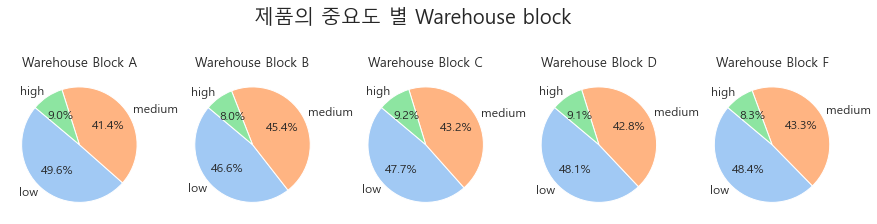

In [27]:

fig, axes = plt.subplots(1, len(df['Warehouse_block'].unique()), figsize=(15, 4))

warehouse_block_order = ['A', 'B', 'C', 'D', 'F']

for i, block in enumerate(warehouse_block_order):
    df_block = df[df['Warehouse_block'] == block]
    impo_counts = df_block['Product_importance'].value_counts()
    axes[i].pie(impo_counts, labels=impo_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    axes[i].set_title(f'Warehouse Block {block}', fontsize=13)

plt.suptitle('제품의 중요도 별 Warehouse block', fontsize=20)
plt.show()


### 특정 창고마다 중요도와 가격

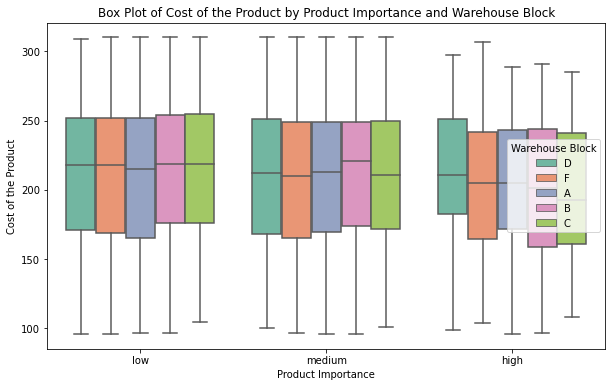

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_importance', y='Cost_of_the_Product', hue='Warehouse_block', palette='Set2')
plt.title('Box Plot of Cost of the Product by Product Importance and Warehouse Block')
plt.xlabel('Product Importance')
plt.ylabel('Cost of the Product')
plt.legend(title='Warehouse Block')
plt.show()

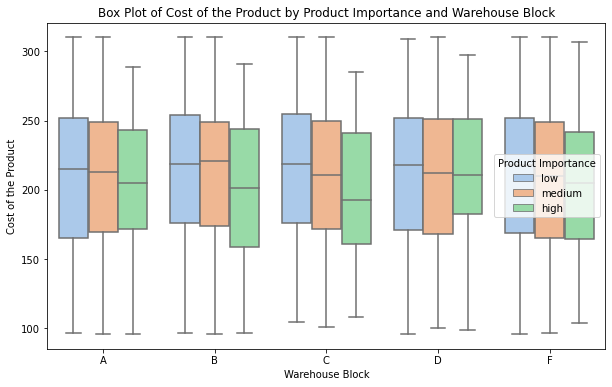

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Warehouse_block', y='Cost_of_the_Product', hue='Product_importance', order=['A', 'B', 'C', 'D', 'F'])
plt.title('Box Plot of Cost of the Product by Product Importance and Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Cost of the Product')
plt.legend(title='Product Importance')
plt.show()

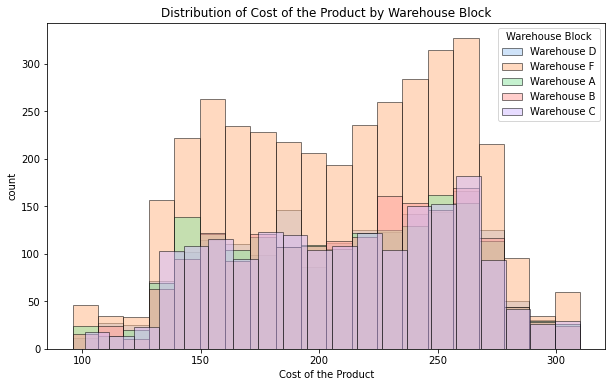

In [34]:
import matplotlib.pyplot as plt

# 각 Warehouse_block에 대해 히스토그램 그리기
plt.figure(figsize=(10, 6))
for warehouse_block in df['Warehouse_block'].unique():
    plt.hist(df[df['Warehouse_block'] == warehouse_block]['Cost_of_the_Product'], bins=20, alpha=0.5, label=f'Warehouse {warehouse_block}', edgecolor='black')

plt.title('Distribution of Cost of the Product by Warehouse Block')
plt.xlabel('Cost of the Product')
plt.ylabel('count')
plt.legend(title='Warehouse Block')

plt.show()


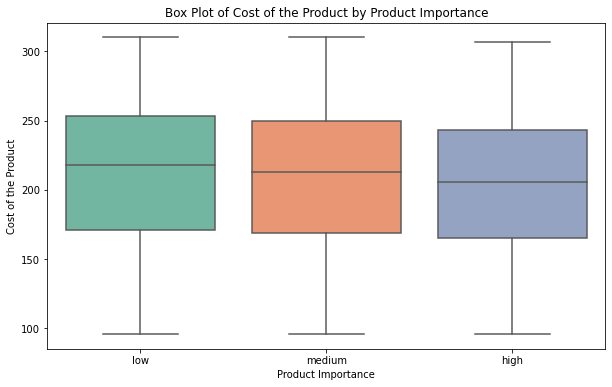

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_importance', y='Cost_of_the_Product', palette='Set2')
plt.title('Box Plot of Cost of the Product by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Cost of the Product')
plt.show()


- 창고별 상품 중요도

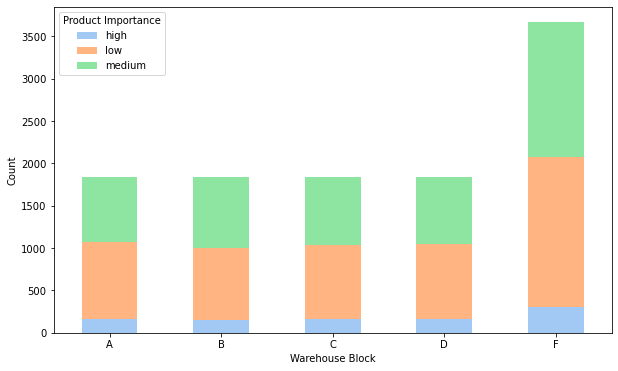

In [22]:
cross_tab = pd.crosstab(df['Warehouse_block'], df['Product_importance'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Bar Plot of Warehouse Block vs. Product Importance')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Product Importance')
plt.show()


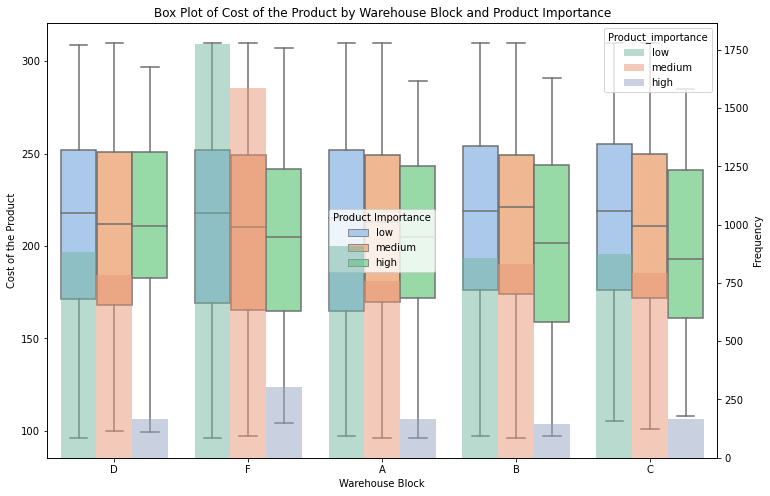

In [15]:
plt.figure(figsize=(12, 8))

# 상자 그림
sns.boxplot(data=df, x='Warehouse_block', y='Cost_of_the_Product', hue='Product_importance')
plt.title('Box Plot of Cost of the Product by Warehouse Block and Product Importance')
plt.xlabel('Warehouse Block')
plt.ylabel('Cost of the Product')
plt.legend(title='Product Importance')

# 막대 그래프
plt.twinx()
sns.countplot(data=df, x='Warehouse_block', hue='Product_importance', palette='Set2', alpha=0.5)
plt.ylabel('Frequency')

plt.show()

평균가격

In [43]:
# 각 Warehouse_block별로 상품들의 평균 가격을 데이터프레임으로 추출
average_cost_per_block = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean().reset_index()

# 데이터프레임으로 출력
average_cost_per_block

,Warehouse_block,Cost_of_the_Product
0,A,208.767594
1,B,212.159302
2,C,211.191489
3,D,210.907852
4,F,209.077196


### 특정 창고마다 어떤 성별의 고객의 구매율이 높은지


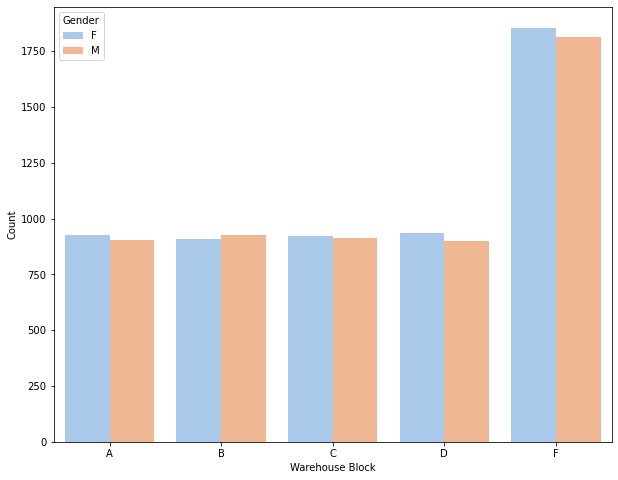

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Warehouse_block', hue='Gender', order=['A', 'B', 'C', 'D', 'F'])
# plt.title('Mode of Shipment by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

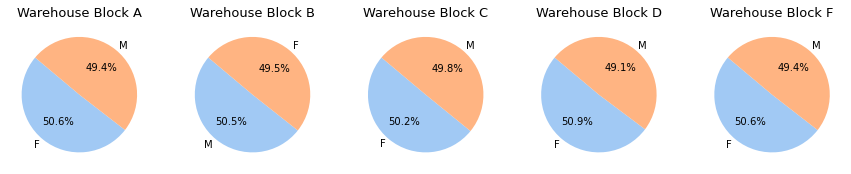

In [24]:

fig, axes = plt.subplots(1, len(df['Warehouse_block'].unique()), figsize=(15, 5))

warehouse_block_order = ['A', 'B', 'C', 'D', 'F']

for i, block in enumerate(warehouse_block_order):
    df_block = df[df['Warehouse_block'] == block]
    impo_counts = df_block['Gender'].value_counts()
    axes[i].pie(impo_counts, labels=impo_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Warehouse Block {block}', fontsize=13)

# plt.suptitle('Mode of Shipment Distribution by Warehouse Block')
plt.show()


### 특정 창고마다 무게가 다른지

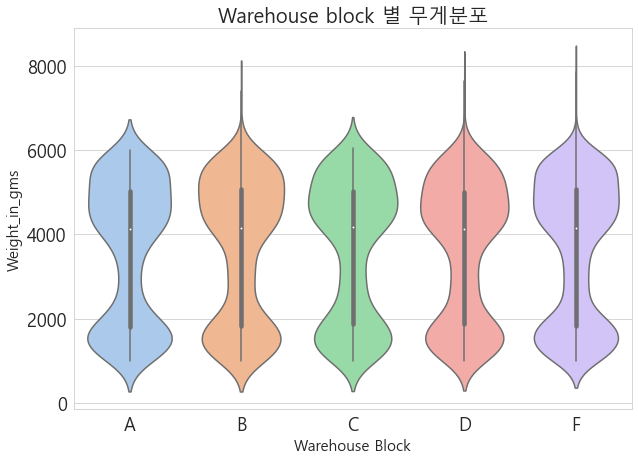

In [34]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Warehouse_block', y='Weight_in_gms', data=df, order=['A', 'B', 'C', 'D', 'F'])
# plt.title('Distribution of Weight_in_gms by Warehouse Block')
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel('Weight_in_gms', fontsize=15)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('Warehouse block 별 무게분포', fontsize=20)
plt.show()

### 창고별 정시도착 여부

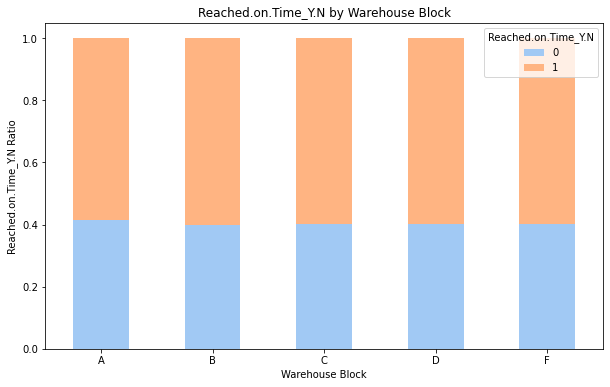

In [52]:
# Warehouse_block 별 Reached.on.Time_Y.N의 비율 계산
reach_rate = df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack()

# 막대 그래프 생성
reach_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Reached.on.Time_Y.N by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Reached.on.Time_Y.N Ratio')
plt.legend(title='Reached.on.Time_Y.N', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#### 정시도착한 비율

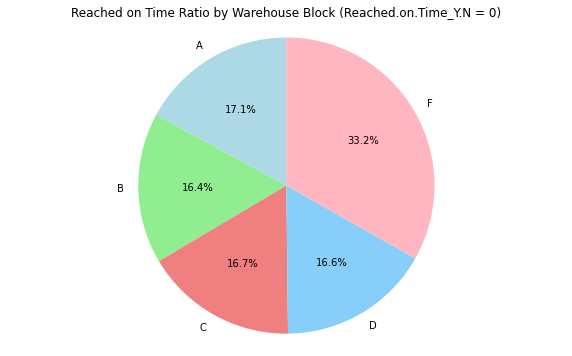

In [54]:
# Warehouse_block 별 Reached.on.Time_Y.N이 0일 때의 비율 계산
reach_rate = df[df['Reached.on.Time_Y.N'] == 0].groupby('Warehouse_block').size() / len(df[df['Reached.on.Time_Y.N'] == 0])

# 파이차트 생성
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
plt.pie(reach_rate, labels=reach_rate.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Reached on Time Ratio by Warehouse Block (Reached.on.Time_Y.N = 0)')
plt.axis('equal')  # 원을 원형으로 표시
plt.show()

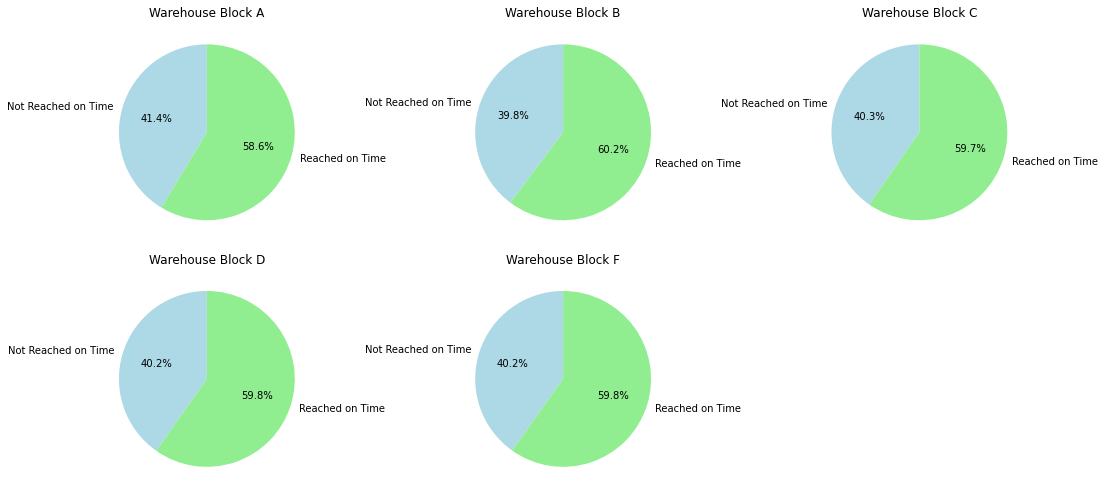

In [61]:
# 각 Warehouse_block 별로 Reached.on.Time_Y.N이 0과 1인 비율 계산
reach_rate = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().unstack()
reach_rate.fillna(0, inplace=True)
total_reach = reach_rate.sum(axis=1)
reach_rate_ratio = reach_rate.div(total_reach, axis=0)

# Warehouse_block 목록
warehouse_blocks = reach_rate_ratio.index

# 파이차트 생성
plt.figure(figsize=(15, 7))
colors = ['lightblue', 'lightgreen']

for i, block in enumerate(warehouse_blocks):
    plt.subplot(2, 3, i+1)
    plt.pie(reach_rate_ratio.loc[block], labels=['Not Reached on Time', 'Reached on Time'], autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Warehouse Block {block}')

plt.tight_layout()
plt.show()

# Mode_of_Shipment

- 무게별 배송방법
- 제품 가격별 배송방법
- 중요도별 배송방법
- 배송별 정시도착여부

### 일단 무게 그래프 

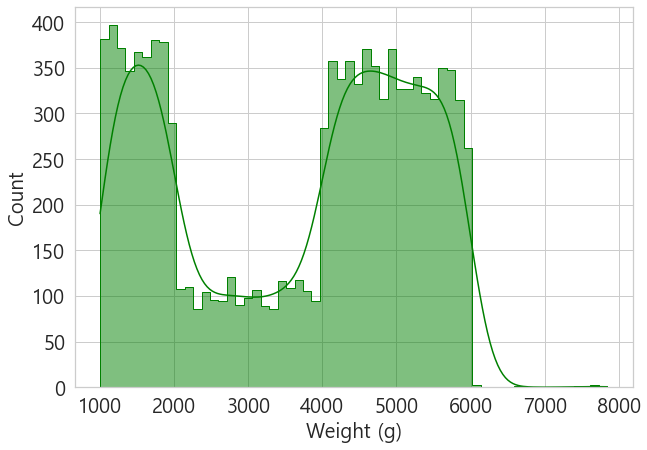

In [194]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weight_in_gms'], bins=60, kde=True, element='step', color='green')
# sns.kdeplot(df['Weight_in_gms'], color='blue')
plt.xlabel('Weight (g)', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
# plt.title('Distribution of Weights')
plt.show()

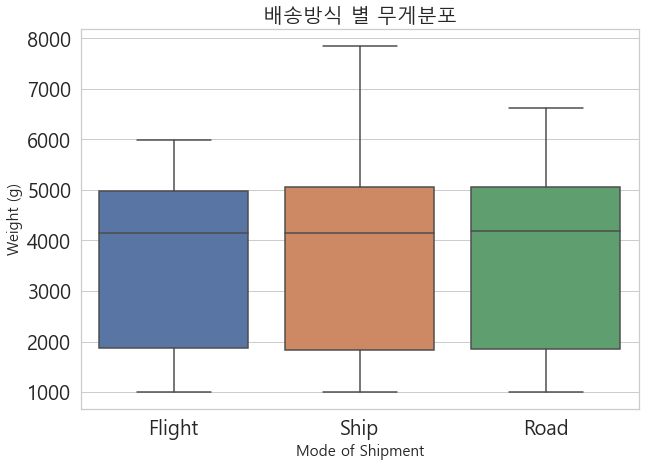

In [9]:
# 무게별 배송방법에 대한 시각화
plt.figure(figsize=(10, 7))
sns.boxplot(x="Mode_of_Shipment", y="Weight_in_gms", data=df)
# plt.title("무게별 배송방법")
plt.xlabel("Mode of Shipment", fontsize=15)
plt.ylabel("Weight (g)", fontsize=15)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('배송방식 별 무게분포', fontsize=20)
plt.show()

In [40]:
df[['Mode_of_Shipment', 'Weight_in_gms']].sort_values(by='Weight_in_gms', ascending=False)[:50]

,Mode_of_Shipment,Weight_in_gms
199,Ship,7846
245,Ship,7684
198,Ship,7640
205,Ship,7588
213,Ship,7401
257,Road,6614
251,Road,6102
244,Ship,6064
8739,Ship,6000
3278,Road,6000


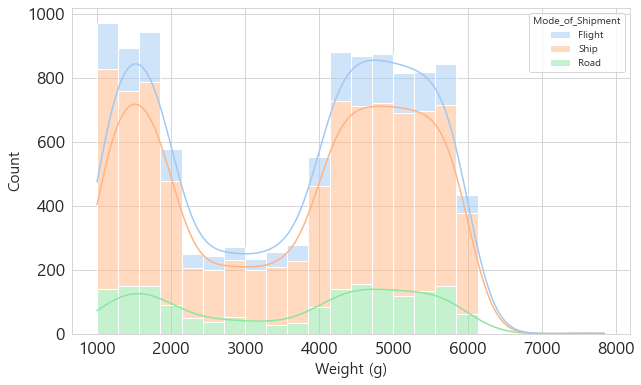

In [37]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weight_in_gms', hue='Mode_of_Shipment', multiple='stack', kde=True)
# plt.title('Weight Distribution by Shipping Mode')
plt.xlabel('Weight (g)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

# # 산점도 그리기
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Weight_in_gms', y='Some_other_variable', hue='Mode_of_Shipment')
# plt.title('Relationship between Weight and Another Variable by Shipping Mode')
# plt.xlabel('Weight (grams)')
# plt.ylabel('Some other variable')
# plt.show()

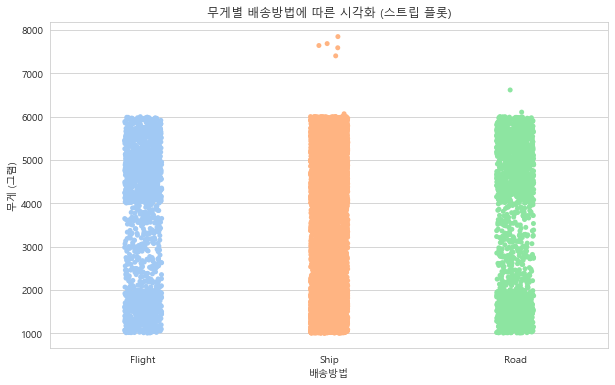

In [40]:
# 스트립 플롯
plt.figure(figsize=(10, 6))
sns.stripplot(x="Mode_of_Shipment", y="Weight_in_gms", data=df, jitter=True)
plt.title("무게별 배송방법에 따른 시각화 (스트립 플롯)")
plt.xlabel("배송방법")
plt.ylabel("무게 (그램)")
plt.show()

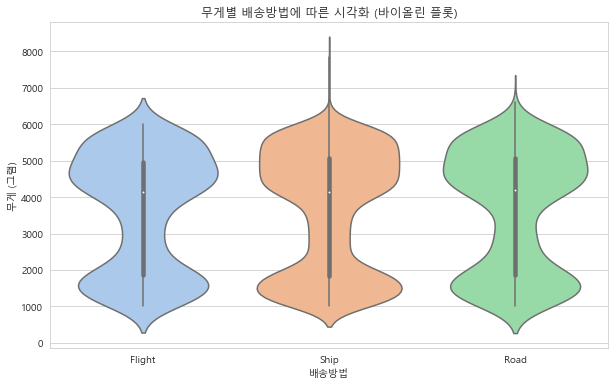

In [38]:
# 바이올린 플롯
plt.figure(figsize=(10, 6))
sns.violinplot(x="Mode_of_Shipment", y="Weight_in_gms", data=df)
plt.title("무게별 배송방법에 따른 시각화 (바이올린 플롯)")
plt.xlabel("배송방법")
plt.ylabel("무게 (그램)")
plt.show()

### 무게, 배송방법, 제시간 도착여부 그래프

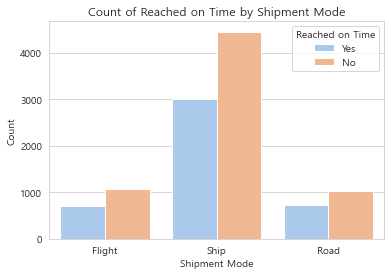

In [46]:
# 산점도 그래프 그리기
sns.countplot(x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", data=df)

# 그래프 제목과 축 레이블 설정
plt.title("Count of Reached on Time by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Count")

# 범례 표시
plt.legend(title="Reached on Time", labels=["Yes", "No"], loc="upper right")

# 그래프 출력
plt.show()

# 그럼 1,2kg 이랑 4,6kg 따로 봐보자

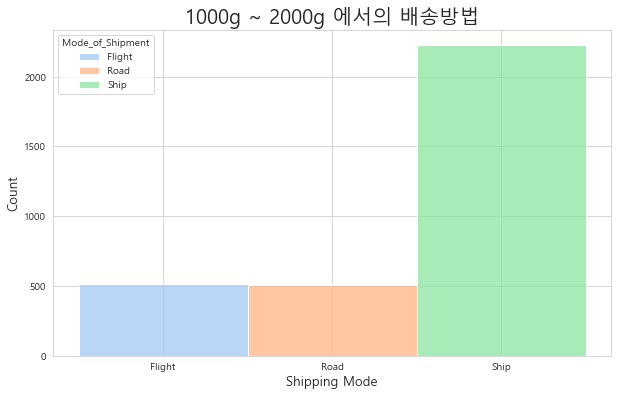

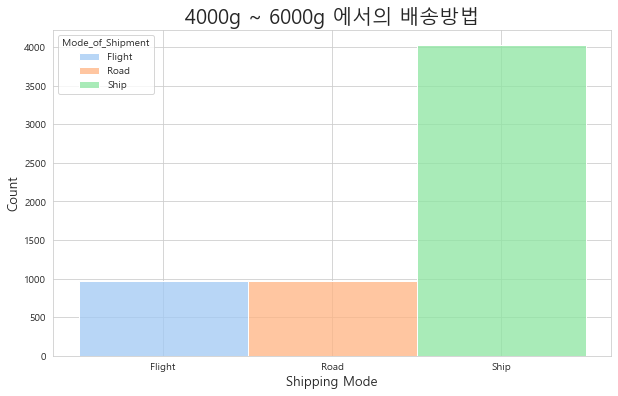

In [24]:
# 범주형 데이터로 변환하여 순서 지정
df['Mode_of_Shipment'] = pd.Categorical(df['Mode_of_Shipment'], categories=['Flight', 'Road', 'Ship'], ordered=True)

# 1000과 2000 사이 값 및 4000에서 6000 사이 값에 해당하는 상품 필터링
subset_1 = df[(df['Weight_in_gms'] >= 1000) & (df['Weight_in_gms'] <= 2000)]
subset_2 = df[(df['Weight_in_gms'] >= 4000) & (df['Weight_in_gms'] <= 6000)]

# seaborn을 사용하여 각 배송방법별로 무게 구간에 해당하는 상품의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=subset_1, x='Mode_of_Shipment', hue='Mode_of_Shipment', multiple='stack')
plt.title('1000g ~ 2000g 에서의 배송방법', fontsize=20)
plt.xlabel('Shipping Mode', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=subset_2, x='Mode_of_Shipment', hue='Mode_of_Shipment', multiple='stack')
plt.title('4000g ~ 6000g 에서의 배송방법', fontsize=20)
plt.xlabel('Shipping Mode', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

In [25]:
# 1000에서 2000 사이 제품의 개수
df[(df['Weight_in_gms'] >= 1000) & (df['Weight_in_gms'] <= 2000)].shape[0]


3245

In [26]:
# 4000에서 6000 사이 제품의 개수
count_4000_to_6000 = df[(df['Weight_in_gms'] >= 4000) & (df['Weight_in_gms'] <= 6000)].shape[0]

In [28]:
bins = [1000, 2000, 4000, 6000]

# 무게 구간에 따라 레이블 생성
labels = ['1000~2000', '2000~4000', '4000~6000']

# 무게 구간별 제품 개수 계산
product_counts = pd.cut(df['Weight_in_gms'], bins=bins, labels=labels, right=False).value_counts().reset_index()
product_counts.columns = ['Weight Range', 'Product Count']

product_counts

,Weight Range,Product Count
0,4000~6000,5957
1,1000~2000,3241
2,2000~4000,1790


## 제품 가격별 배송방법

### 제품가격

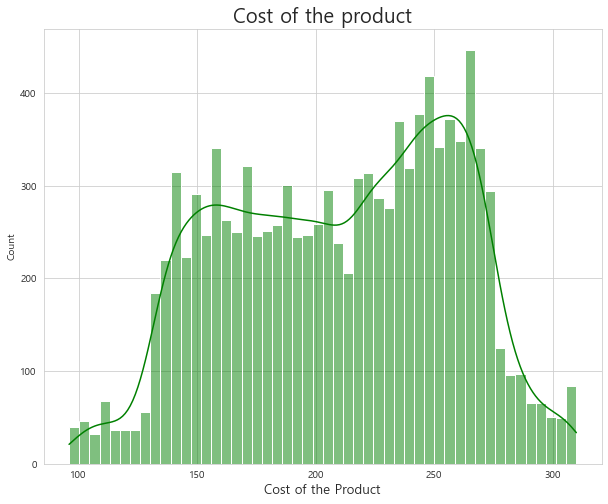

In [37]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Cost_of_the_Product', kde=True, color='green', bins=50)
plt.title("Cost of the product", fontsize=20)
plt.xlabel('Cost of the Product', fontsize=13)
plt.show()

### 제품가격별 배송방법 (바이올린)

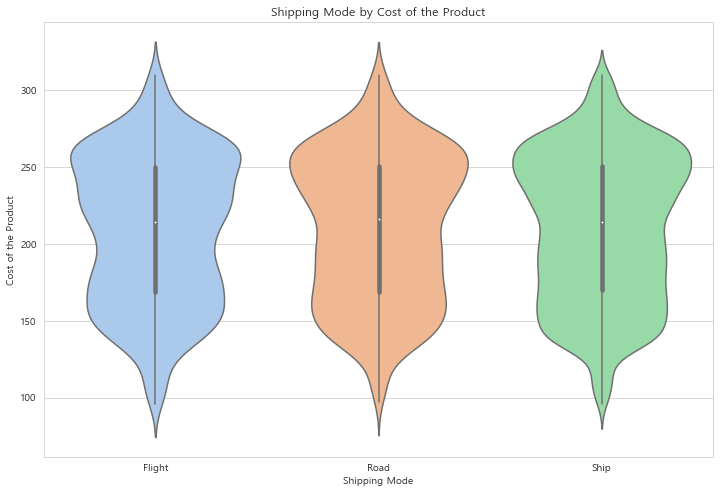

In [38]:
# 바이올린 플롯을 사용하여 제품 가격별로 배송 방법을 시각화
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Mode_of_Shipment', y='Cost_of_the_Product')
plt.title('Shipping Mode by Cost of the Product')
plt.xlabel('Shipping Mode')
plt.ylabel('Cost of the Product')
plt.show()

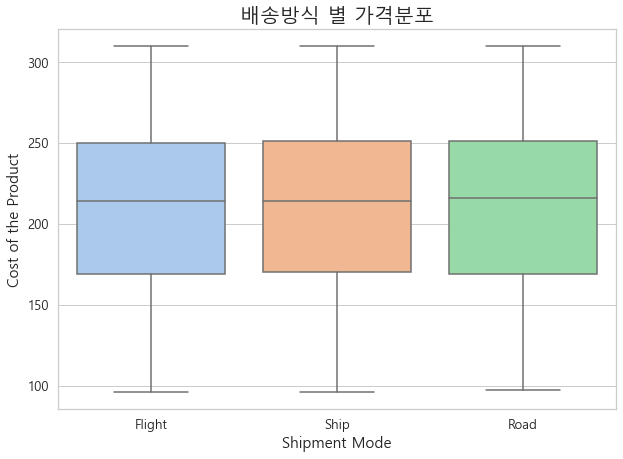

In [20]:
# 박스 플롯 그리기
plt.figure(figsize=(10, 7))
sns.boxplot(x='Mode_of_Shipment', y='Cost_of_the_Product', data=df)
# plt.title('Distribution of Shipment Mode by Product Cost')
plt.xlabel('Shipment Mode', fontsize=15)
plt.ylabel('Cost of the Product', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('배송방식 별 가격분포', fontsize=20)
plt.show()

In [42]:
df['Cost_of_the_Product'].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

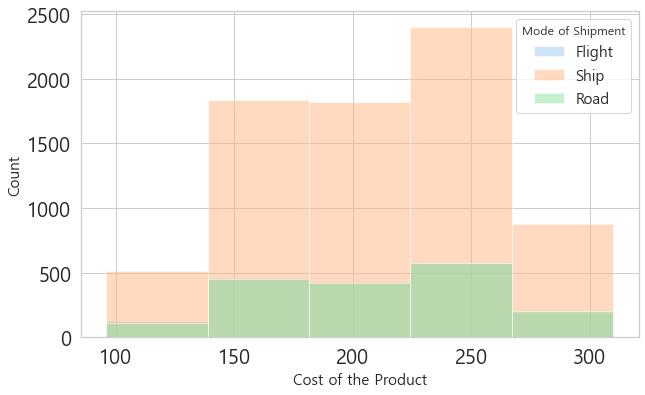

In [208]:
# 등간격 구간분할 설정
min_value = df['Cost_of_the_Product'].min()
max_value = df['Cost_of_the_Product'].max()
num_bins = 5  # 구간 개수
bin_width = (max_value - min_value) / num_bins
bins = [min_value + i * bin_width for i in range(num_bins + 1)]

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
for mode in df['Mode_of_Shipment'].unique():
    plt.hist(df[df['Mode_of_Shipment'] == mode]['Cost_of_the_Product'], bins=bins, alpha=0.5, label=mode)

# plt.title('Distribution of Shipment Mode by Product Cost')
plt.xlabel('Cost of the Product', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(title='Mode of Shipment', fontsize=15)
plt.show()

In [49]:
# 각 구간의 배송 방법 빈도 계산하여 데이터프레임으로 저장
frequency_by_bin = {}
for i in range(num_bins):
    bin_lower = bins[i]
    bin_upper = bins[i+1]
    bin_data = df[(df['Cost_of_the_Product'] >= bin_lower) & (df['Cost_of_the_Product'] < bin_upper)]
    mode_counts = bin_data['Mode_of_Shipment'].value_counts()
    frequency_by_bin[f'Bin {i+1} ({bin_lower}-{bin_upper})'] = mode_counts

# 결과를 데이터프레임으로 변환하여 출력
frequency_df = pd.DataFrame(frequency_by_bin)
frequency_df # 결측값을 0으로 채워서 출력

,Bin 1 (96.0-138.8),Bin 2 (138.8-181.6),Bin 3 (181.6-224.39999999999998),Bin 4 (224.39999999999998-267.2),Bin 5 (267.2-310.0)
Flight,128,457,425,577,187
Road,110,451,423,576,199
Ship,516,1840,1823,2404,866


가격대별 제품 중요도도 볼 수 있을듯

### 중요도별 배송방법

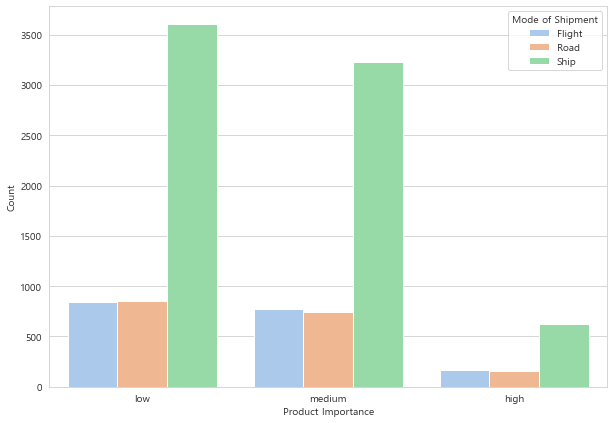

In [55]:
# 막대 그래프로 시각화
plt.figure(figsize=(10, 7))
sns.countplot(x='Product_importance', hue='Mode_of_Shipment', data=df)
# plt.title('Shipment Mode by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Mode of Shipment')
plt.show()

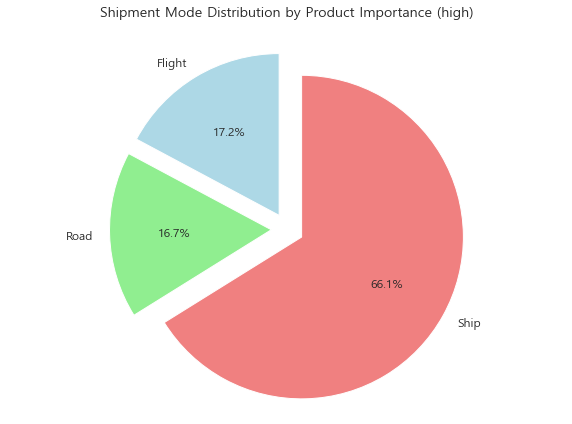

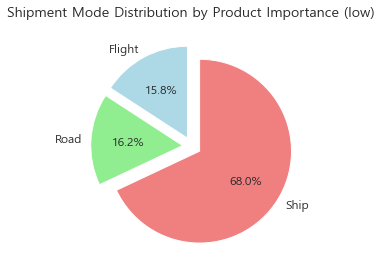

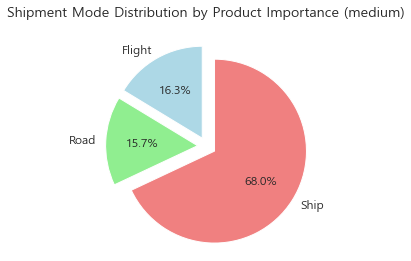

In [56]:
# 각 제품 중요도 수준에 대한 배송 방식 빈도 계산
mode_counts_by_importance = df.groupby('Product_importance')['Mode_of_Shipment'].value_counts().unstack()

# 파이 차트로 시각화
plt.figure(figsize=(10, 7))
colors = ['lightblue', 'lightgreen', 'lightcoral']  # 파이 차트 색상 설정
explode = (0.1, 0.1, 0.1)  # 조각 간의 간격 설정
labels = mode_counts_by_importance.index
for i, label in enumerate(labels):
    plt.pie(mode_counts_by_importance.loc[label], labels=mode_counts_by_importance.columns, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})
    plt.title(f'Shipment Mode Distribution by Product Importance ({label})', fontsize=14, pad=20)
    plt.axis('equal')  # 원형으로 출력
    plt.show()

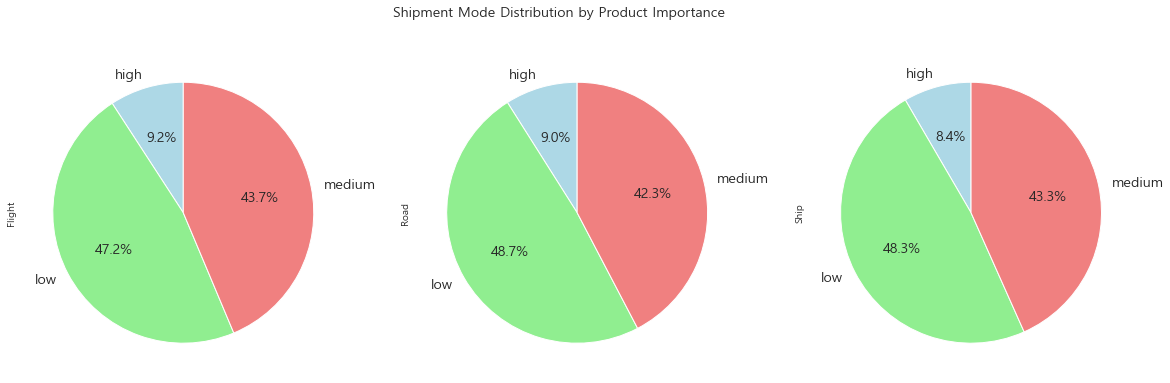

In [69]:
# 각 제품 중요도 수준에 대한 배송 방식 빈도 계산
mode_counts_by_importance = df.groupby('Product_importance')['Mode_of_Shipment'].value_counts().unstack()

# 파이 차트로 시각화
mode_counts_by_importance.plot(kind='pie', subplots=True, figsize=(20, 6), autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90, legend=False, fontsize=14)
# plt.legend(title='Shipment Mode', loc='upper right')
plt.suptitle('Shipment Mode Distribution by Product Importance', fontsize=14)
plt.show()

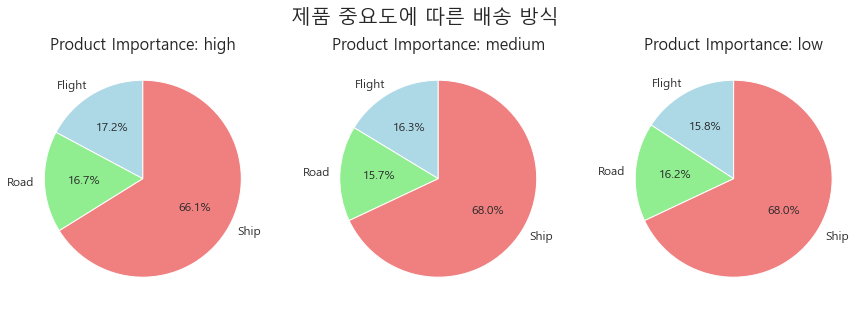

In [44]:
# 각 제품 중요도 수준에 대한 배송 방식 빈도 계산
mode_counts_by_importance = df.groupby('Product_importance')['Mode_of_Shipment'].value_counts().unstack()

# 원하는 순서로 재정렬
desired_order = ['high', 'medium', 'low']
mode_counts_by_importance = mode_counts_by_importance.loc[desired_order]


# 파이 차트로 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (importance, mode_counts) in enumerate(mode_counts_by_importance.iterrows()):
    mode_counts.plot(kind='pie', ax=axs[i], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90, fontsize=12)
    axs[i].set_title(f'Product Importance: {importance}', fontsize=16)
    axs[i].set_ylabel('')  # y축 레이블 제거
plt.suptitle('제품 중요도에 따른 배송 방식', fontsize=20)
plt.show()

### 배송별 정시도착여부

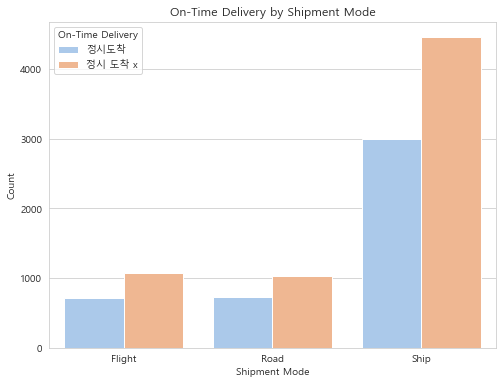

In [89]:
# 카운트 플롯으로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df)
plt.title('On-Time Delivery by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.legend(title='On-Time Delivery', labels=['정시도착', '정시 도착 x'])
plt.show()

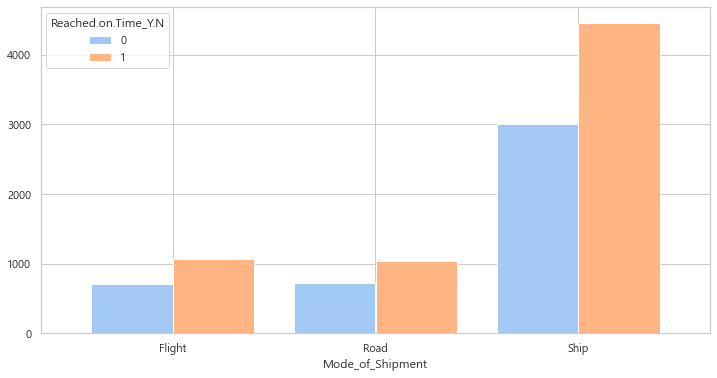

In [160]:
# 각 그룹에서 가장 많이 등장하는 제품 찾기
most_common_products = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()

# 막대그래프 그리기
most_common_products.plot(kind='bar', figsize=(12, 6), width=0.8)
# plt.title('Product Purchases by Warehouse Block and Gender')
# plt.xlabel('Warehouse Block')
# plt.ylabel('Count')
plt.xticks(rotation=0)
# plt.legend(title='Gender')
plt.show()

## 성별
- 배송문의 전화 횟수
- 이전구매횟수
- 창고


### 배송문의전화

- 성별로 배송 문의 전화 횟수 평균

In [92]:
df.groupby('Gender')['Customer_care_calls'].mean()

Gender
F    4.051578
M    4.057389
Name: Customer_care_calls, dtype: float64

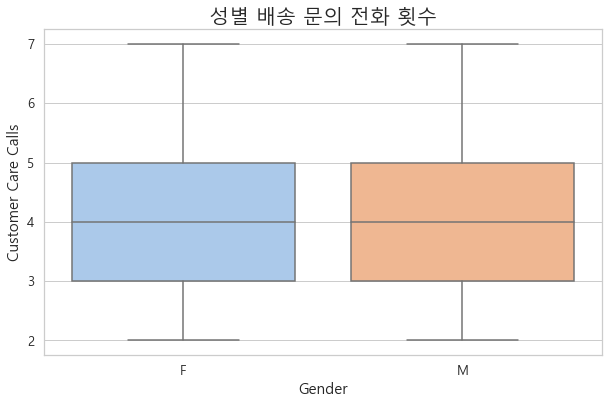

In [44]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Customer_care_calls', data=df)
plt.title("성별 배송 문의 전화 횟수", fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Customer Care Calls', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

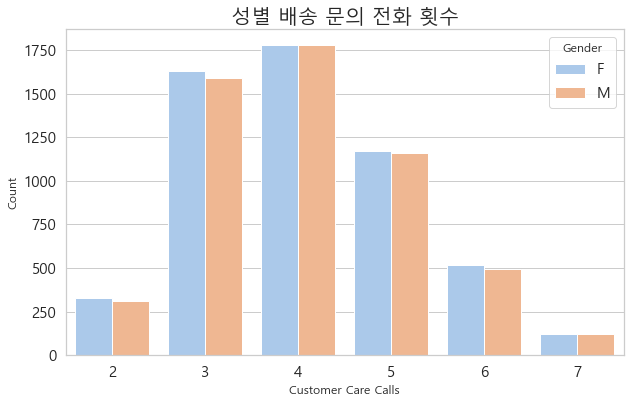

In [45]:
# countplot 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Gender', data=df)
plt.title('성별 배송 문의 전화 횟수', fontsize=20)
plt.xlabel('Customer Care Calls')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

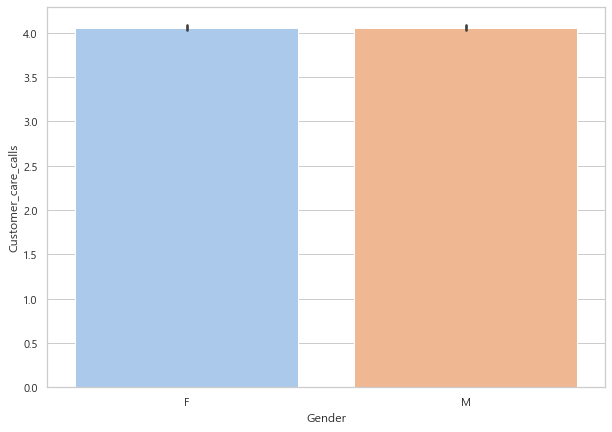

In [164]:
plt.figure(figsize = (10, 7))
sns.barplot(x = 'Gender', y = 'Customer_care_calls', data = df)
plt.show()

### 이전 구매 횟수

In [103]:
df.groupby('Gender')['Prior_purchases'].mean()

Gender
F    3.581785
M    3.553172
Name: Prior_purchases, dtype: float64

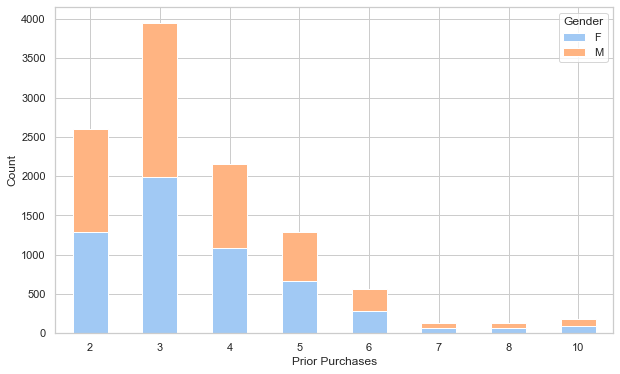

In [114]:
# 이전 구매횟수별 성별 분포를 나타내는 데이터프레임 생성
prior_purchases_gender = df.groupby(['Prior_purchases', 'Gender']).size().unstack()

# 막대 그래프 그리기
prior_purchases_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Gender Distribution by Prior Purchases')
plt.xlabel('Prior Purchases')
plt.ylabel('Count')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.legend(title='Gender')
plt.show()

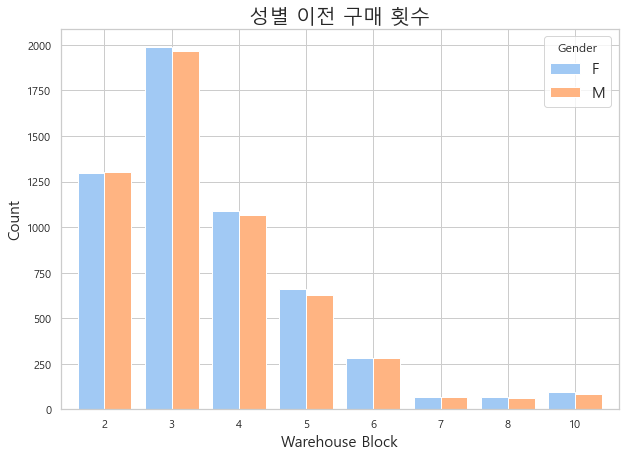

In [35]:
# 각 그룹에서 가장 많이 등장하는 제품 찾기
most_common_products = df.groupby(['Prior_purchases', 'Gender']).size().unstack()

# 막대그래프 그리기
most_common_products.plot(kind='bar', figsize=(10, 7), width=0.8)
plt.title('성별 이전 구매 횟수', fontsize=20)
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0)
plt.legend(title='Gender', fontsize=15)
plt.show()

### 창고

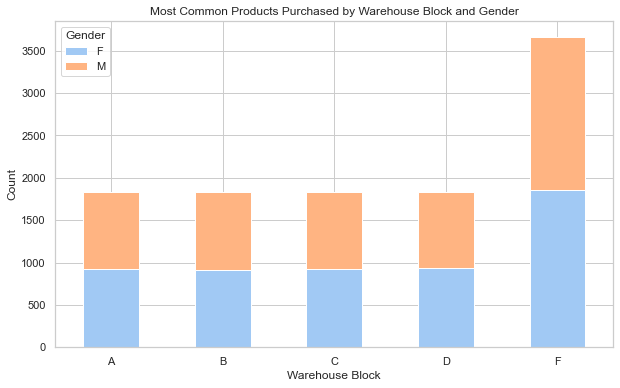

In [116]:
# 각 그룹에서 가장 많이 등장하는 제품 찾기
most_common_products = df.groupby(['Warehouse_block', 'Gender'])['Warehouse_block'].count().unstack()

# 막대그래프 그리기
most_common_products.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Most Common Products Purchased by Warehouse Block and Gender')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

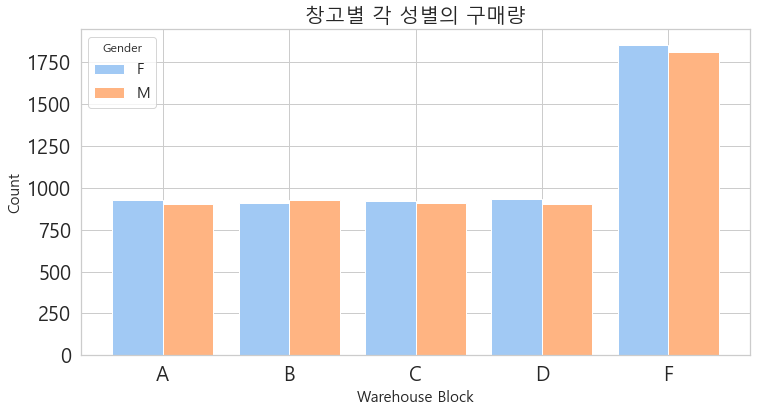

In [36]:
# 각 그룹에서 가장 많이 등장하는 제품 찾기
most_common_products = df.groupby(['Warehouse_block', 'Gender']).size().unstack()

# 막대그래프 그리기
most_common_products.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('창고별 각 성별의 구매량', fontsize=20)
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title='Gender', fontsize=15)
plt.show()

In [119]:
df.groupby(['Warehouse_block', 'Gender']).size().unstack()

Gender,F,M
Warehouse_block,,
A,928,905
B,908,925
C,921,912
D,933,901
F,1855,1811


In [118]:
df.groupby(['Warehouse_block', 'Gender']).size().unstack().loc['B']

Gender
F    908
M    925
Name: B, dtype: int64

# Customer care calls
- 제품 가격마다 문의횟수
- 제품 중요도마다 문의 횟수
- 무게마다 문의 횟수

## Reach on time

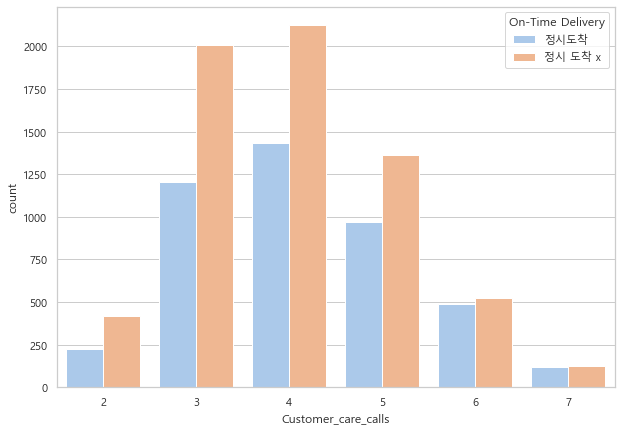

In [133]:
plt.figure(figsize = (10, 7))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df)
# plt.title('On-Time Delivery by Shipment Mode')
# plt.xlabel('Shipment Mode')
# plt.ylabel('Count')
plt.legend(title='On-Time Delivery', labels=['정시도착', '정시 도착 x'])
plt.show()

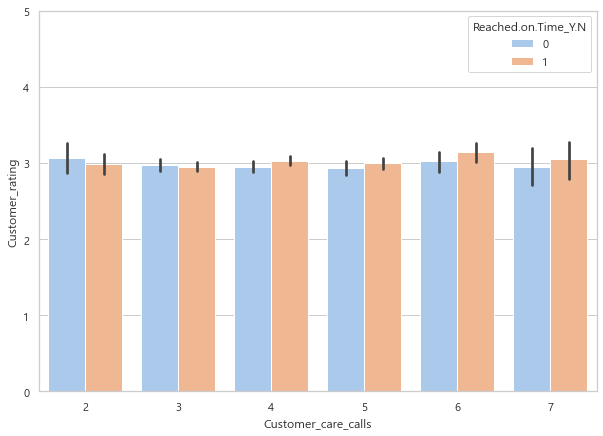

In [136]:
plt.figure(figsize = (10, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df)
plt.ylim(0, 5)
plt.show()

## 제품 중요도

제품 중요도가 낮을수록 고객 관리가 더 많이 이루어졌습니다.
제품 중요도가 낮거나 중간이면 제 시간에 도달하지 못한 제품이 더 많지만, 제품 중요도가 높으면 제 시간에 도달하거나 제 시간에 도달하지 못한 제품이 거의 동일합니다.

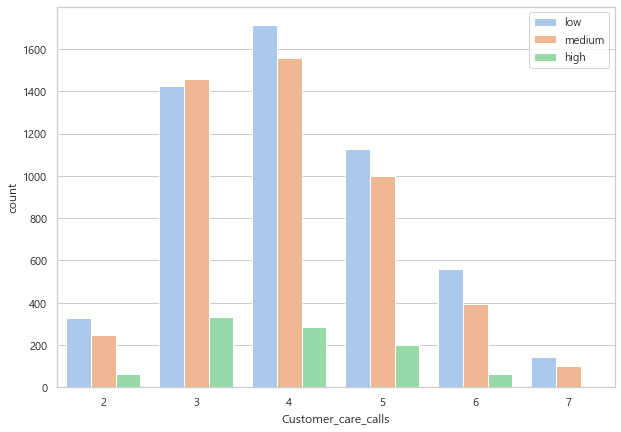

In [143]:
plt.figure(figsize = (10, 7))
sns.countplot(x='Customer_care_calls', hue='Product_importance', data=df)
# plt.title('On-Time Delivery by Shipment Mode')
# plt.xlabel('Shipment Mode')
# plt.ylabel('Count')
plt.legend()
plt.show()

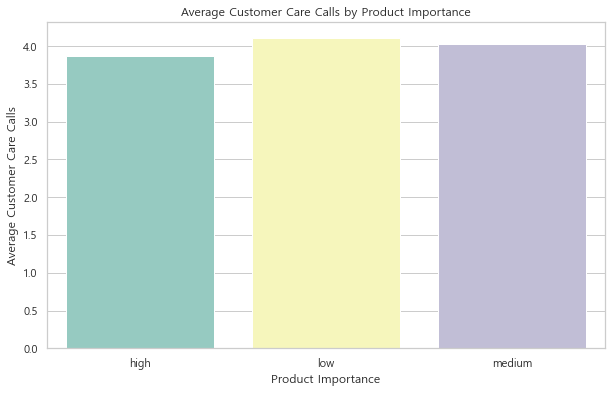

In [148]:
# 제품 중요도별 평균 고객 문의전화 횟수 계산
mean_calls_by_importance = df.groupby('Product_importance')['Customer_care_calls'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_calls_by_importance.index, y=mean_calls_by_importance.values, palette='Set3')
plt.title('Average Customer Care Calls by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Average Customer Care Calls')
plt.show()

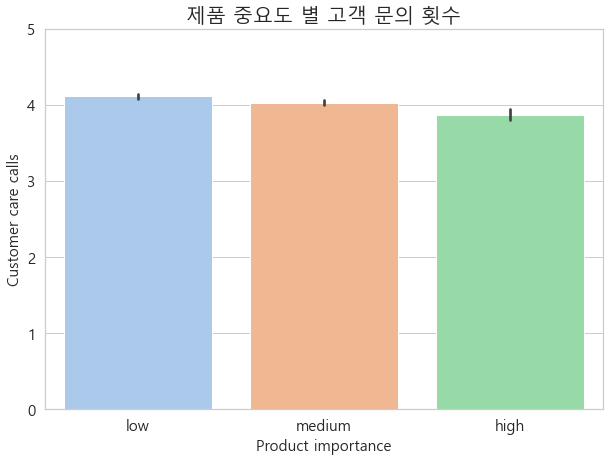

In [47]:
plt.figure(figsize = (10, 7))
sns.barplot(x = 'Product_importance', y = 'Customer_care_calls', data = df)
plt.title('제품 중요도 별 고객 문의 횟수', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Product importance', fontsize=15)
plt.ylabel('Customer care calls', fontsize=15)
plt.ylim(0, 5)
plt.show()

### 제품중요도와 정시도착여부

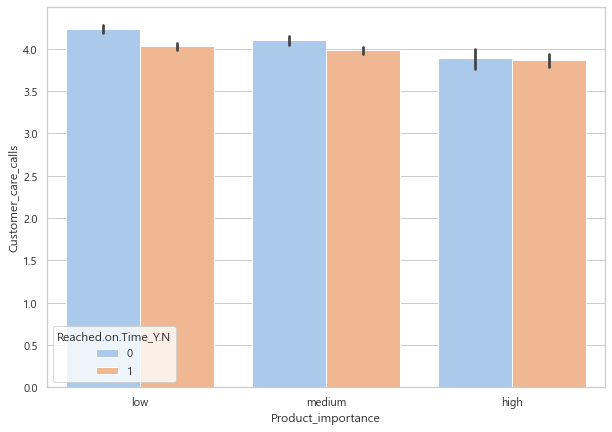

In [154]:
plt.figure(figsize = (10, 7))
sns.barplot(x='Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

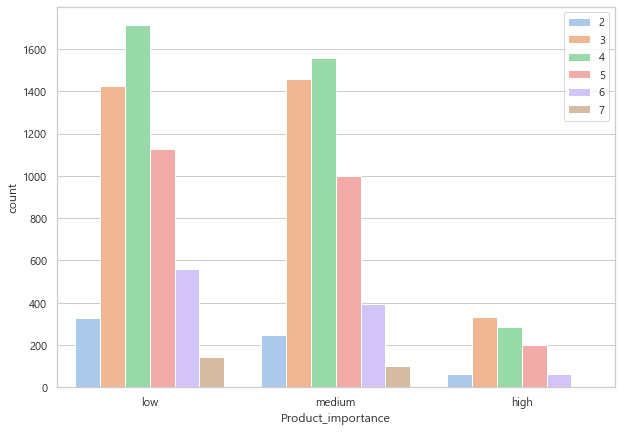

In [155]:
plt.figure(figsize = (10, 7))
sns.countplot(x='Product_importance', hue='Customer_care_calls', data=df)
# plt.title('On-Time Delivery by Shipment Mode')
# plt.xlabel('Shipment Mode')
# plt.ylabel('Count')
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

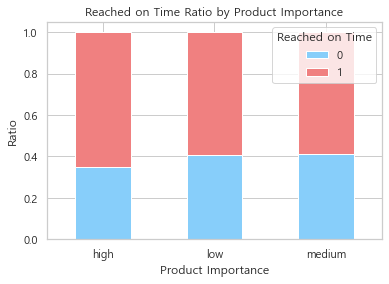

In [179]:

# 각 제품 중요도별 정시 도착 여부의 비율 계산
importance_reached_ratio = df.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
importance_reached_ratio.plot(kind='bar', stacked=True, color=['lightskyblue', 'lightcoral'])
plt.title('Reached on Time Ratio by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Ratio')
plt.xticks(rotation=0)  # x축 눈금 라벨의 회전을 0도로 설정하여 가로로 표시
plt.legend(title='Reached on Time')
plt.show()

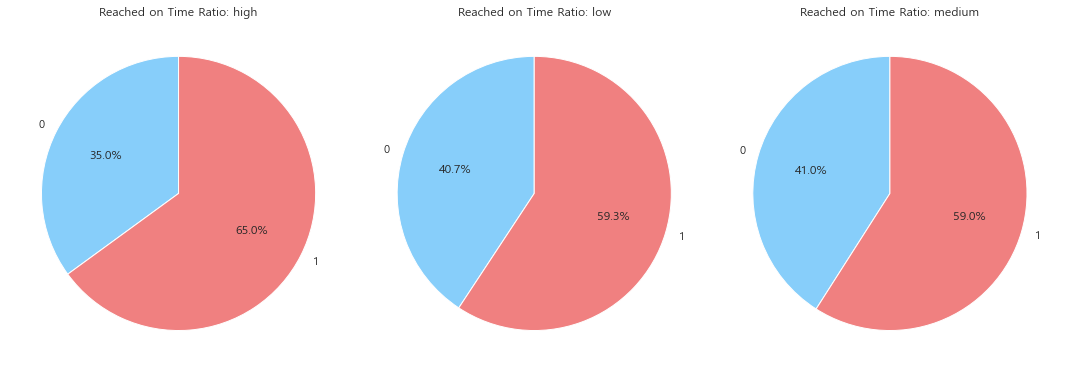

In [181]:
# 각 제품 중요도별 정시 도착 여부의 비율 계산
importance_reached_ratio = df.groupby('Product_importance')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack()

# 서브플롯으로 파이차트 그리기
fig, axes = plt.subplots(nrows=1, ncols=len(importance_reached_ratio), figsize=(15, 6))
colors = ['lightskyblue', 'lightcoral']

for ax, (product_importance, ratio) in zip(axes, importance_reached_ratio.iterrows()):
    ax.pie(ratio, labels=ratio.index, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Reached on Time Ratio: {product_importance}')

plt.tight_layout()
plt.show()

# 할인(Discount_offered)
- 사전 구매가 많을 수록 할인이 많을까?

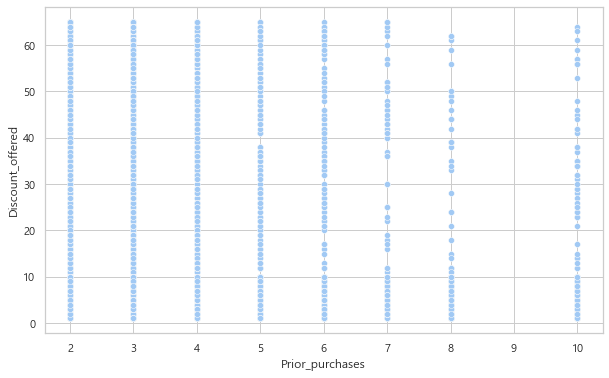

In [168]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prior_purchases', y='Discount_offered', data=df)
# plt.title('Relationship between Prior Purchases and Discount Offered')
# plt.xlabel('Prior Purchases')
# plt.ylabel('Discount Offered')
plt.show()

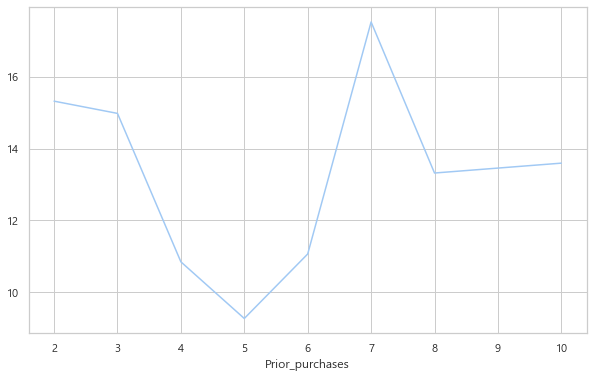

In [169]:
# 사전 구매 횟수별 할인율의 평균 계산
mean_discount_by_purchases = df.groupby('Prior_purchases')['Discount_offered'].mean()

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_discount_by_purchases.index, y=mean_discount_by_purchases.values)
# plt.title('Mean Discount Offered by Prior Purchases')
# plt.xlabel('Prior Purchases')
# plt.ylabel('Mean Discount Offered')
plt.show()

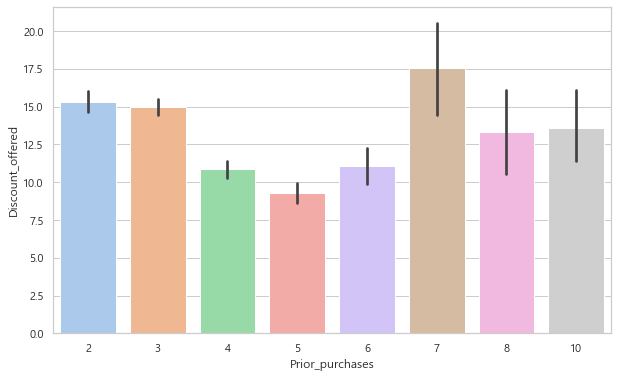

In [174]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Prior_purchases', y='Discount_offered', data=df)
# plt.title('Discount Offered by Prior Purchases')
# plt.xlabel('Prior Purchases')
# plt.ylabel('Discount Offered')
plt.show()

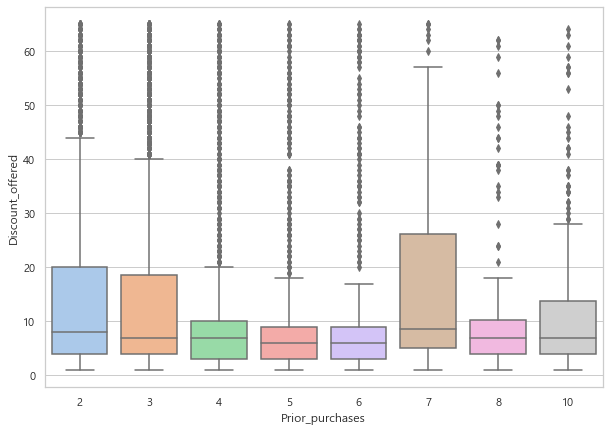

In [182]:
# 상자 그림 그리기
plt.figure(figsize=(10, 7))
sns.boxplot(x='Prior_purchases', y='Discount_offered', data=df)
# plt.title('Discount Offered by Prior Purchases')
# plt.xlabel('Prior Purchases')
# plt.ylabel('Discount Offered')
plt.show()

## 제품 가격과 문의전화 횟수의 관계

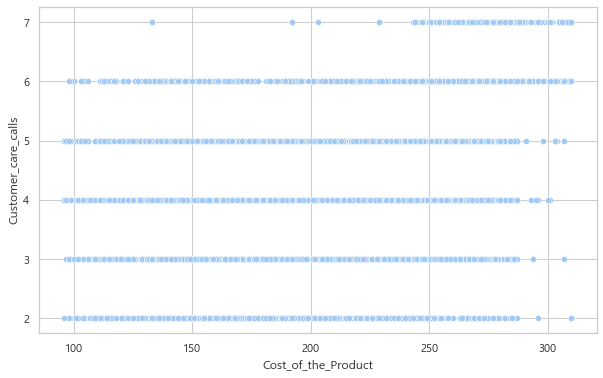

In [183]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost_of_the_Product', y='Customer_care_calls', data=df)
# plt.title('Relationship between Cost of the Product and Customer Care Calls')
# plt.xlabel('Cost of the Product')
# plt.ylabel('Customer Care Calls')
plt.show()

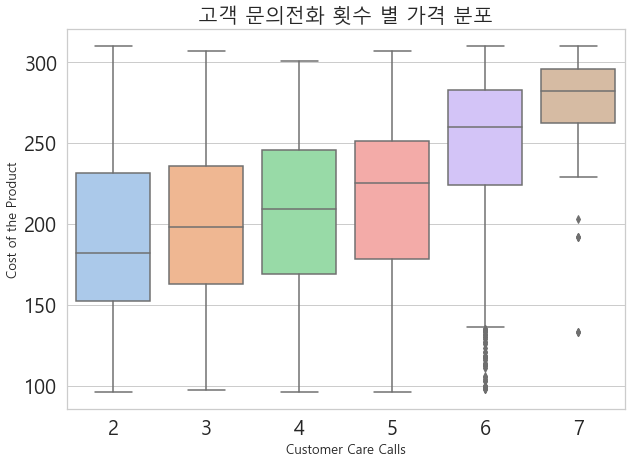

In [46]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df)
plt.title('고객 문의전화 횟수 별 가격 분포', fontsize=20)
plt.xlabel('Customer Care Calls', fontsize=13)
plt.ylabel('Cost of the Product', fontsize=13)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### 무게별 문의횟수

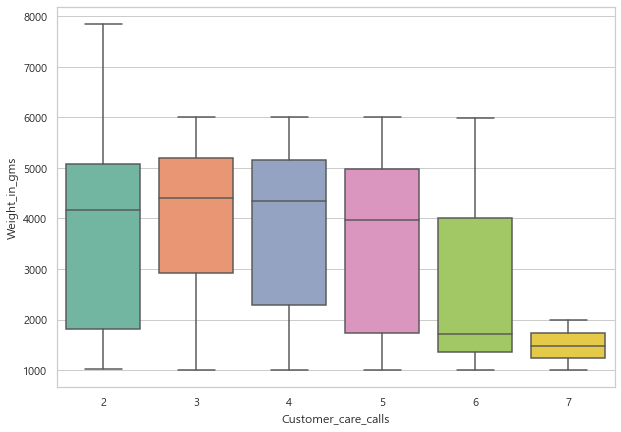

In [187]:
# 상자 그림 그리기
plt.figure(figsize=(10, 7))
sns.boxplot(x='Customer_care_calls', y='Weight_in_gms', data=df, palette='Set2')
# plt.title('Weight by Customer Care Calls')
# plt.xlabel('Customer Care Calls')
# plt.ylabel('Weight (in grams)')
plt.show()

### 제품 가격, 문의전화 횟수,  제품 중요도

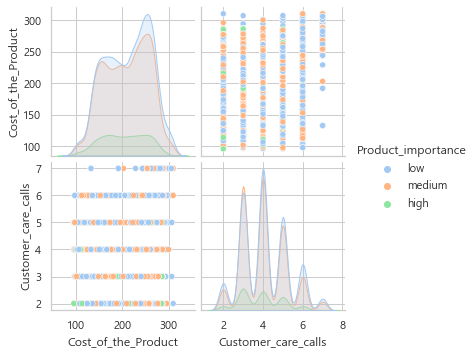

In [189]:
# 산점도 행렬 그리기
sns.pairplot(df, vars=['Cost_of_the_Product', 'Customer_care_calls'], hue='Product_importance')
plt.show()

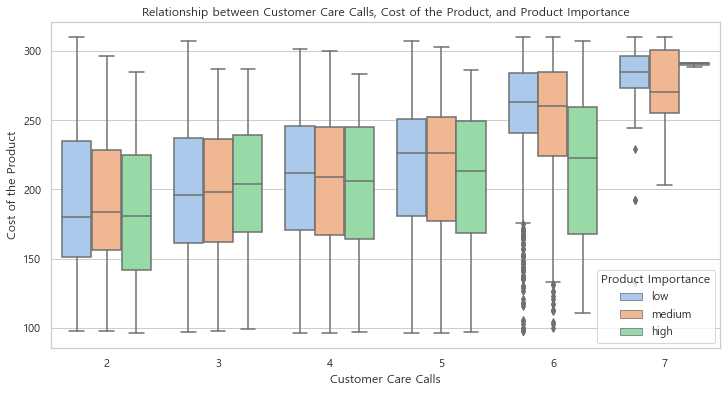

In [192]:
# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer_care_calls', y='Cost_of_the_Product', hue='Product_importance', data=df)
plt.title('Relationship between Customer Care Calls, Cost of the Product, and Product Importance')
plt.xlabel('Customer Care Calls')
plt.ylabel('Cost of the Product')
plt.legend(title='Product Importance')
plt.show()